In [1]:
import pandas as pd
import numpy as np
import time


np.random.seed(33)
df = pd.read_csv("./data/featureSelectedAllDataWithY.csv")
# df = pd.read_csv("../data/Cleaned_dat_encoded.csv")
print(df.shape)
df.head()

(534730, 21)


,esi,age,ethnicity,race,lang,maritalstatus,employstatus,insurance_status,arrivalmode,previousdispo,...,meds_analgesics,meds_antiplateletdrugs,meds_cardiacdrugs,meds_cardiovascular,meds_diuretics,meds_elect/caloric/h2o,meds_gastrointestinal,meds_psychotherapeuticdrugs,meds_vitamins,disposition
0,4,40,1,8,1,8,2,4,6,7,...,0,0,0,0,0,0,0,0,0,2
1,4,66,1,4,1,5,3,1,2,7,...,0,0,0,0,0,0,0,0,0,2
2,2,66,1,4,1,5,3,1,6,3,...,0,0,0,0,0,0,0,0,0,2
3,2,66,1,4,1,5,3,1,2,3,...,0,0,0,0,0,0,0,0,0,2
4,3,84,1,5,2,10,6,3,6,3,...,0,0,0,2,1,2,2,0,1,1


In [2]:
## Split the data into training and testing data
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 427784
No. of testing examples: 106946


In [3]:
from sklearn.preprocessing import StandardScaler
y_train = training_data['disposition']
y_test = testing_data['disposition']
X_train = StandardScaler().fit_transform(training_data.drop("disposition",axis = 1))
X_test = StandardScaler().fit_transform(testing_data.drop("disposition",axis = 1))

y_train = np.array(y_train)[:100]
y_test = np.array(y_test)[:10]
X_train = np.array(X_train)[:100,]
X_test = np.array(X_test)[:10,]


In [8]:
import xgboost 
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=1000, learning_rate=0.05,n_jobs=6)
# Add silent=True to avoid printing out updates with each cycle
clf.fit(X_train, y_train, verbose=True)

/Users/yuxuan/opt/anaconda3/envs/dp3.7/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:05:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
# Making Confusion Matrix and calculating accuracy score

mylist = []
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[2 1]
 [0 7]]
0.9


/Users/yuxuan/opt/anaconda3/envs/dp3.7/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuxuan/opt/anaconda3/envs/dp3.7/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/yuxuan/opt/anaconda3/envs/dp3.7/lib/pyt

[12:10:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

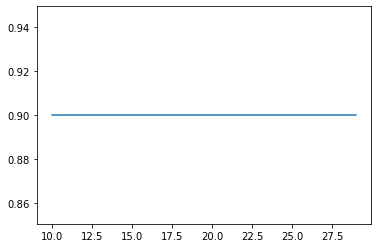

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

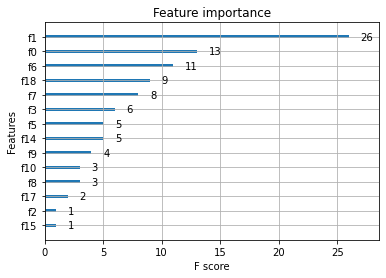

In [12]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

xgb.plot_importance(classifier)

# XGBoost

In [ ]:
import pandas as pd
import numpy as np
import time


np.random.seed(33)
# df = pd.read_csv("../data/featureSelectedAllDataWithY.csv")
df = pd.read_csv("../data/Cleaned_dat_encoded.csv")
print(df.shape)
df.head()

In [ ]:
## Split the data into training and testing data
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25,shuffle=True)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

In [ ]:
from sklearn.preprocessing import StandardScaler
y_train = training_data['disposition']
y_test = testing_data['disposition']
X_train = StandardScaler().fit_transform(training_data.drop("disposition",axis = 1))
X_test = StandardScaler().fit_transform(testing_data.drop("disposition",axis = 1))

# y_train = np.array(y_train)
# y_test = np.array(y_test)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
y_train = np.array(y_train)[:100]
y_test = np.array(y_test)[:10]
X_train = np.array(X_train)[:100,]
X_test = np.array(X_test)[:10,]


In [ ]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=1000, learning_rate=0.05,n_jobs=6)
# Add silent=True to avoid printing out updates with each cycle
clf.fit(X_train, y_train, verbose=True)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
# Making Confusion Matrix and calculating accuracy score

mylist = []
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[2 1]
 [0 7]]
0.9
